<a href="https://colab.research.google.com/github/Chahinezehallaci/Chahinezehallaci/blob/main/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Réduction de dimension et manifold learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.manifold import Isomap
from sklearn.metrics.pairwise import euclidean_distances

## Données simulées

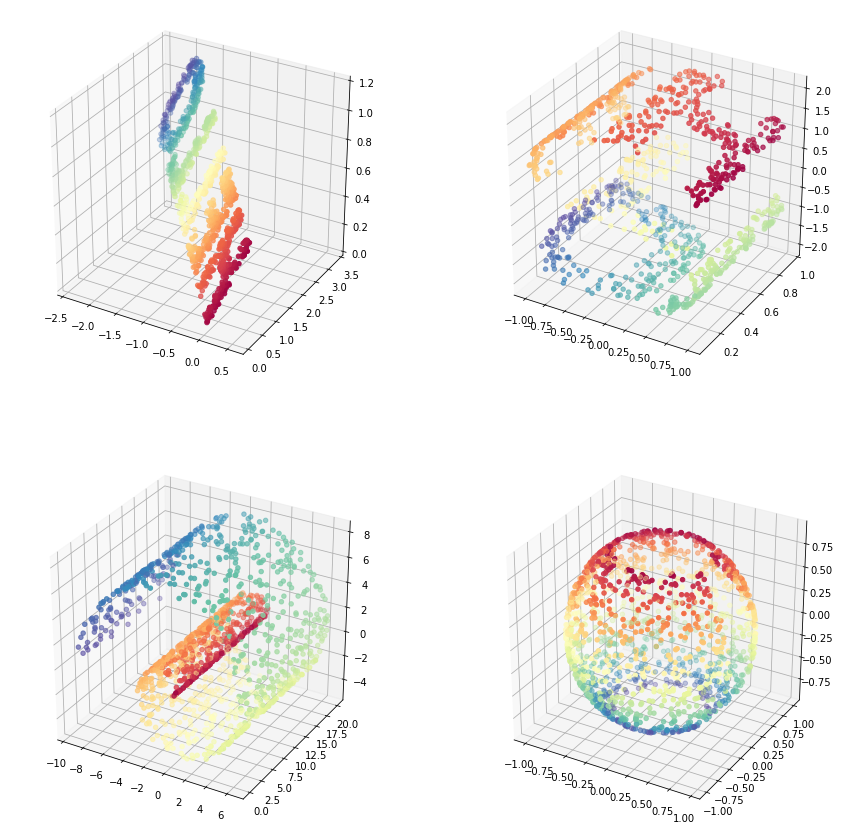

In [ ]:
# Data

from sklearn.datasets import make_swiss_roll

with open('hello.pkl', 'rb') as f1, open('swiss_roll.pkl', 'rb') as f2, open('punched_sphere.pkl', 'rb') as f3:
    hello = pickle.load(f1)
    swiss_roll = pickle.load(f2)
    punched_sphere = pickle.load(f3)

X1 = hello['data1']
X2 = hello['data2']
X3 = swiss_roll['data']
X4 = punched_sphere['data']

c1 = hello['colors'] 
c2 = hello['colors'] 
c3 = swiss_roll['colors']
c4 = punched_sphere['colors']


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=c1, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223, projection='3d')
ax1.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=c3, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224, projection='3d')
ax2.scatter(X4[:, 0], X4[:, 1], X4[:, 2], c=c4, cmap=plt.cm.Spectral)
plt.show()

Les 4 jeux de données ci-dessus sont plongés en 3 dimensions mais sont intrinsèquement de dimension 2. Tentez de trouver une bonne projection bi-dimensionnelle en utilisant les méthodes suivantes: ACP, MDS, Isomap et LLE, disponibles dans `sklearn`. Comparez les méthodes en fonction des cas.

Pour Isomap, choisir le nombre de voisins en utilisant le critère de la variance résiduelle (cf note 42 de l'article de Tenenbaum, de Silva et Langford).

Pour LLE, on pourra éventuellement utiliser la méthode "modified LLE". Pour choisir le nombre de voisins, on pourra se baser sur l'erreur de reconstruction (cf https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html).

# MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2, random_state=0)
X1_mds = mds.fit_transform(X1)
X2_mds = mds.fit_transform(X2)
X3_mds = mds.fit_transform(X3)
X4_mds = mds.fit_transform(X4)

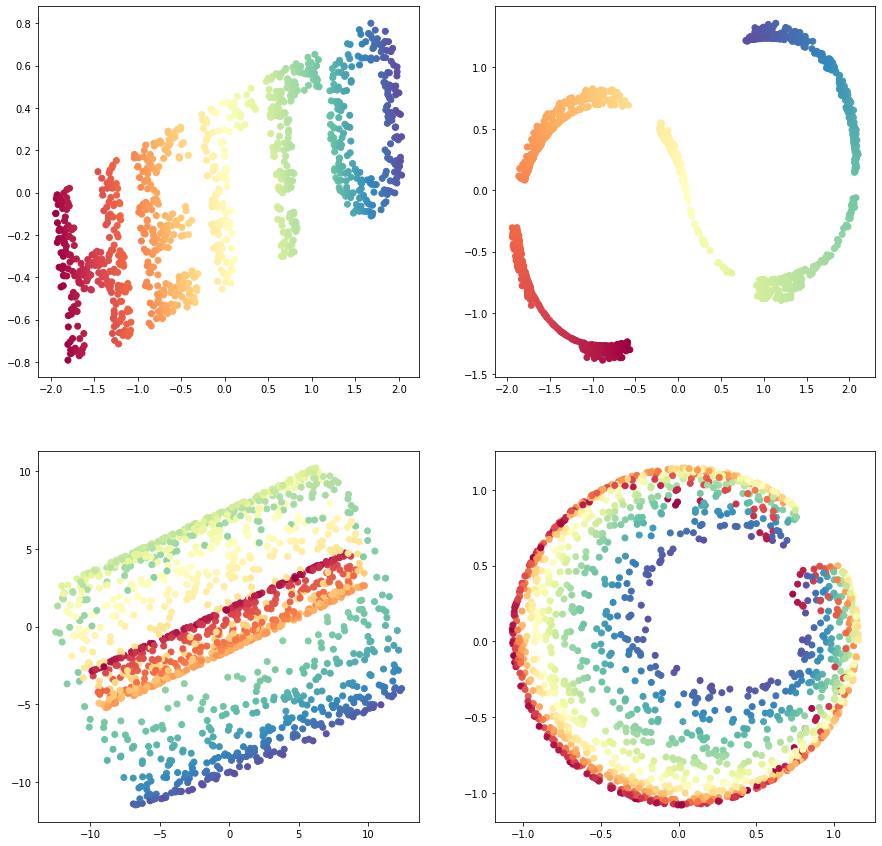

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X1_mds[:, 0], X1_mds[:, 1], c=c1, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(222)
ax2.scatter(X2_mds[:, 0], X2_mds[:, 1], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X3_mds[:, 0], X3_mds[:, 1], c=c3, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224)
ax2.scatter(X4_mds[:, 0], X4_mds[:, 1], c=c4, cmap=plt.cm.Spectral)
plt.show()

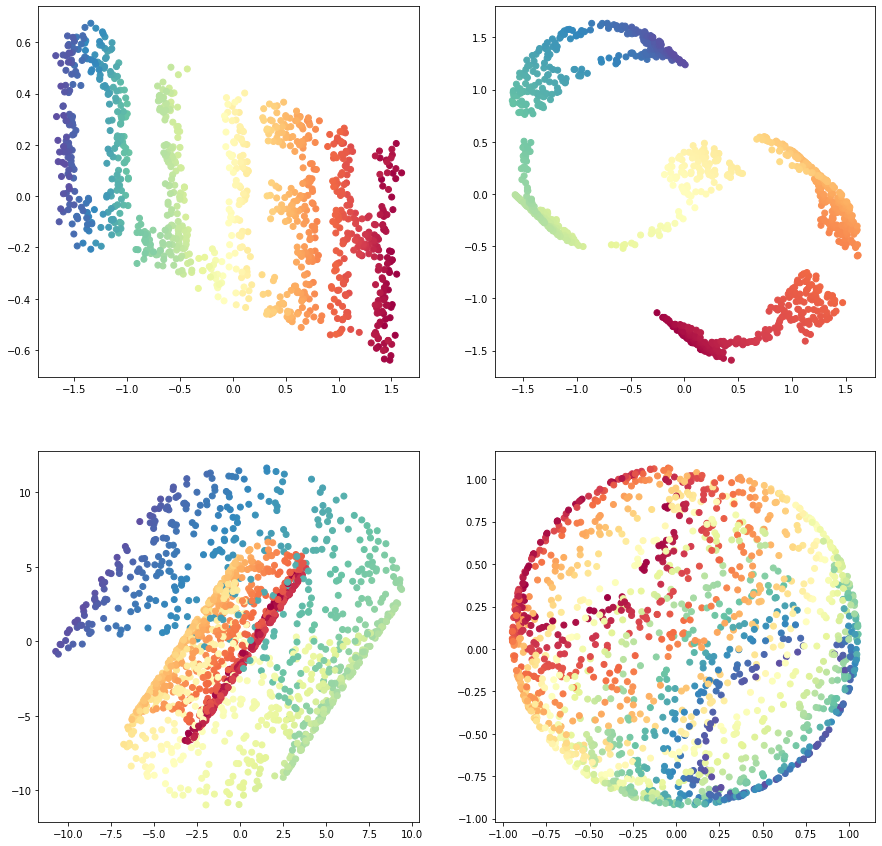

In [ ]:
# Représentation graphique avec des composantes principales différentes 
mds = MDS(n_components=3, random_state=0)

X1_mds = mds.fit_transform(X1)
X2_mds = mds.fit_transform(X2)
X3_mds = mds.fit_transform(X3)
X4_mds = mds.fit_transform(X4)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X1_mds[:, 0], X1_mds[:, 2], c=c1, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(222)
ax2.scatter(X2_mds[:, 0], X2_mds[:, 1], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X3_mds[:, 0], X3_mds[:, 1], c=c3, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224)
ax2.scatter(X4_mds[:, 0], X4_mds[:, 1], c=c4, cmap=plt.cm.Spectral)
plt.show()

# ACP

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
X1_norm = sc.fit_transform(X1)
X2_norm = sc.fit_transform(X2)
X3_norm = sc.fit_transform(X3)
X4_norm = sc.fit_transform(X4)

acp = PCA(n_components=2, random_state=0)

X1_acp = acp.fit_transform(X1_norm)
X2_acp = acp.fit_transform(X2_norm)
X3_acp = acp.fit_transform(X3_norm)
X4_acp = acp.fit_transform(X4_norm)

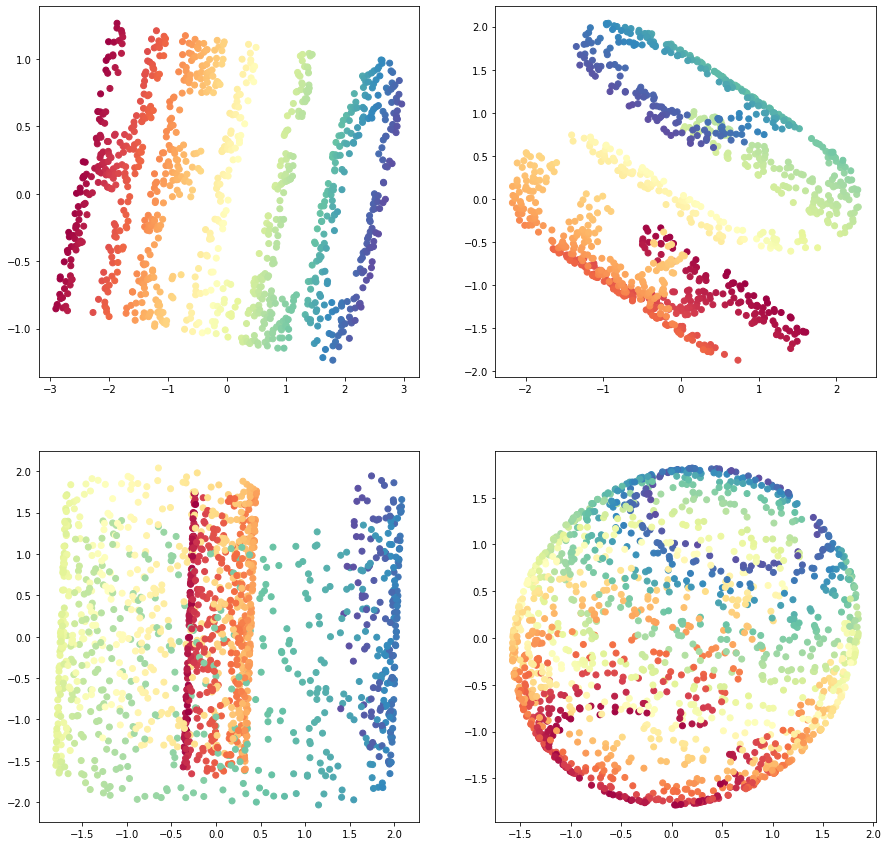

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X1_acp[:, 0], X1_acp[:, 1], c=c1, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(222)
ax2.scatter(X2_acp[:, 0], X2_acp[:, 1], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X3_acp[:, 0], X3_acp[:, 1], c=c3, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224)
ax2.scatter(X4_acp[:, 0], X4_acp[:, 1], c=c4, cmap=plt.cm.Spectral)
plt.show()

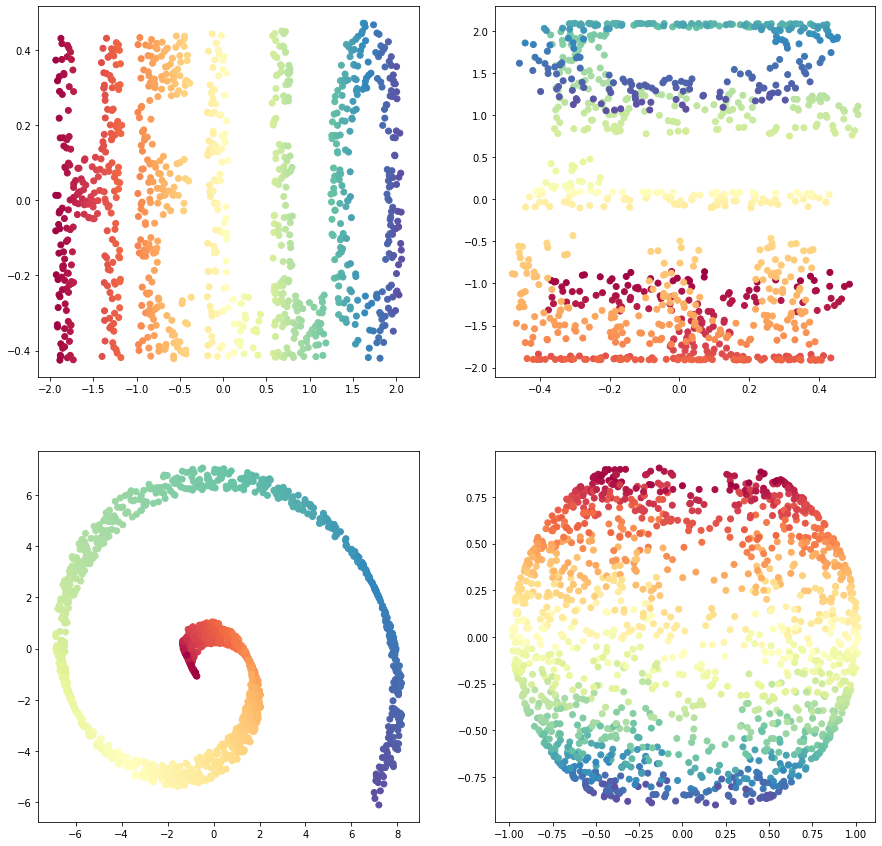

In [ ]:
# Représentation graphique avec des composantes principales différentes 
acp = PCA(n_components=3, random_state=0)

X1_acp = acp.fit_transform(X1)
X2_acp = acp.fit_transform(X2)
X3_acp = acp.fit_transform(X3)
X4_acp = acp.fit_transform(X4)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X1_acp[:, 0], X1_acp[:, 1], c=c1, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(222)
ax2.scatter(X2_acp[:, 2], X2_acp[:, 0], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X3_acp[:, 1], X3_acp[:, 2], c=c3, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224)
ax2.scatter(X4_acp[:, 0], X4_acp[:, 2], c=c4, cmap=plt.cm.Spectral)
plt.show()

# LLE

#### 1) Graphique 1

In [ ]:
from sklearn import manifold
from sklearn.manifold import LocallyLinearEmbedding

#Trouvons le Nombre de voisins optimal

X_err=[]

for i in range(3,100):
    embedding = LocallyLinearEmbedding(n_neighbors=i, n_components=2, method='modified')
    X_transformed = embedding.fit_transform(X1)
    err = embedding.reconstruction_error_
    X_err.append(err)

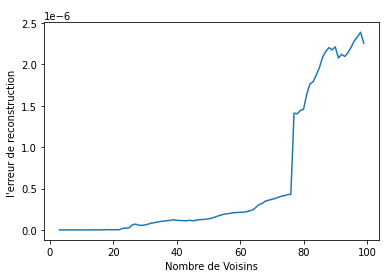

In [ ]:
p=99
plt.plot(np.arange(3,p+1),X_err)
plt.title(" ")
plt.ylabel("l'erreur de reconstruction ")
plt.xlabel("Nombre de Voisins")
plt.show()

Nombre de voisins : 80

In [ ]:
print("Computing LLE embedding")
X_r1, err = manifold.locally_linear_embedding(X1, n_neighbors=80, n_components=3,method='modified')
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 0.0322751


#### 2) Graphique 2 

In [ ]:
X_err=[]

for i in range(5,80):
    embedding = LocallyLinearEmbedding(n_neighbors=i, n_components=2, method='modified')
    X_transformed = embedding.fit_transform(X2)
    err = embedding.reconstruction_error_
    X_err.append(err)
print(X_err)

[1.2308892446272865e-17, 5.177730765879239e-17, 6.202911917160732e-17, 4.930061190626711e-16, 9.205600524634878e-17, 3.5463412021193986e-16, 1.6300249075915956e-16, 1.8397686185751826e-16, 3.6161021204753466e-16, -2.46900594826939e-17, 2.9641799080617853e-16, 3.660253835781667e-16, -4.0160438293147867e-16, 4.125348820863816e-17, 1.3655063246599976e-15, 1.4515253666705283e-07, 1.7870450917460243e-07, 2.7792600291811146e-07, 3.2107588556533484e-07, 4.1722862864805293e-07, 4.779448216855721e-07, 5.403724857475909e-07, 6.125408718745332e-07, 6.856733164341531e-07, 8.679387772029633e-07, 9.431366357815292e-07, 1.1494730100919417e-06, 1.3909681918696394e-06, 1.885929119942765e-06, 1.9568792810344124e-06, 2.1992038110487463e-06, 2.4222028105810414e-06, 2.672096789672236e-06, 2.9569721323217064e-06, 3.4057886582088154e-06, 3.751430091322155e-06, 1.0734738171414384e-05, 1.2009532323793193e-05, 1.4322385318747073e-05, 1.5550700642450967e-05, 1.7052440079305217e-05, 2.5334811127790838e-05, 5.5068

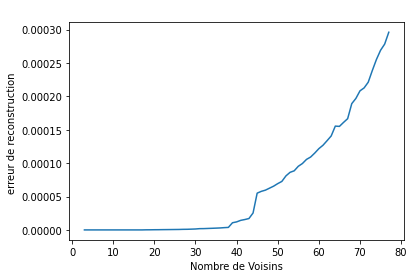

In [ ]:
p=77
plt.plot(np.arange(3,p+1),X_err)
plt.title(" ")
plt.ylabel("erreur de reconstruction ")
plt.xlabel("Nombre de Voisins")
plt.show()

Nombre de voisins : 37

In [ ]:
print("Computing LLE embedding")
X_r2, err = manifold.locally_linear_embedding(X2, n_neighbors=37, n_components=3,method='modified')
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 1.07514e-05


#### 3) Graphique 3

In [ ]:
X_err=[]

for i in range(3,90):
    X_r, err = manifold.locally_linear_embedding(X3, n_neighbors=i, n_components=2)
    X_err.append(err)
print(X_err)

[2.1092705536028533e-18, 1.339806949396002e-17, 6.496015522524165e-17, 1.0348210484900005e-09, 1.410565200648784e-09, 5.701041412861019e-09, 8.62581337559494e-09, 8.058431164285356e-09, 1.5253773109290745e-08, 1.1505649619925915e-08, 1.7106308307110615e-08, 2.4664830151854794e-08, 3.054219016077176e-08, 3.663598185829381e-08, 2.3885225302144058e-08, 2.1530671103665967e-08, 3.9102730711497825e-08, 4.419040579393208e-08, 6.091730932073117e-08, 8.618999347975754e-08, 8.268313211513396e-08, 8.180615266191204e-08, 8.999882667950994e-08, 9.692021152097612e-08, 1.165148170403912e-07, 1.0275841222184316e-07, 1.1457818829434365e-07, 1.1759602559181638e-07, 1.0291376281145517e-07, 1.0234230205131526e-07, 9.397253379895416e-08, 8.90102665240737e-08, 9.666810552032072e-08, 2.975181483035893e-07, 2.8753489155323315e-07, 2.869778740177786e-07, 3.2481601962120214e-07, 3.235865222099789e-07, 3.3430845085239336e-07, 4.0337782684713227e-07, 3.8995084903770025e-07, 6.398190522747433e-07, 6.69890400422406

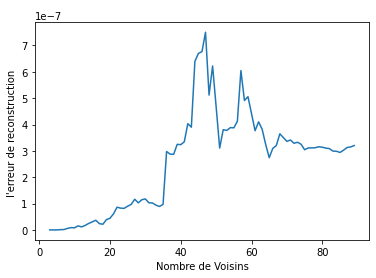

In [ ]:
p=89
plt.plot(np.arange(3,p+1),X_err)
plt.title(" ")
plt.ylabel("l'erreur de reconstruction ")
plt.xlabel("Nombre de Voisins")
plt.show()

Nombre de voisins =12

In [ ]:
print("Computing LLE embedding")
X_r3, err = manifold.locally_linear_embedding(X3, n_neighbors=12, n_components=3)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 3.18007e-07


#### 4) Graphique 4

In [ ]:
X_err=[]

for i in range(3,20):
    X_r, err = manifold.locally_linear_embedding(X4, n_neighbors=i, n_components=2)
    X_err.append(err)
print(X_err)

[2.0714366156830635e-17, 1.51022547359161e-17, 4.398613542785576e-10, 4.248599708252814e-09, 4.844025333915192e-08, 1.8925424656493236e-07, 6.337535350740422e-07, 8.143442111476861e-07, 1.045054995966475e-06, 8.044499815253234e-07, 1.6132189000977184e-06, 2.664439328098294e-06, 3.2844073665259068e-06, 3.6111011653557555e-06, 5.880797471673385e-06, 6.423701470684379e-06, 8.374014564170665e-06]


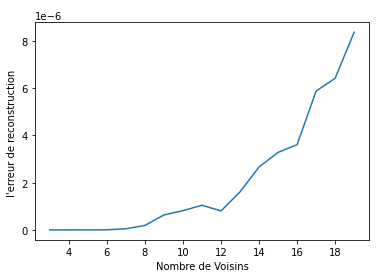

In [ ]:
p=19
plt.plot(np.arange(3,p+1),X_err)
plt.title(" ")
plt.ylabel("l'erreur de reconstruction ")
plt.xlabel("Nombre de Voisins")
plt.show()

Nombre de voisins = 8

In [ ]:
print("Computing LLE embedding")
X_r4, err = manifold.locally_linear_embedding(X4, n_neighbors=8, n_components=3)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 5.7536e-07


### Les 4 plots

<Figure size 432x288 with 0 Axes>

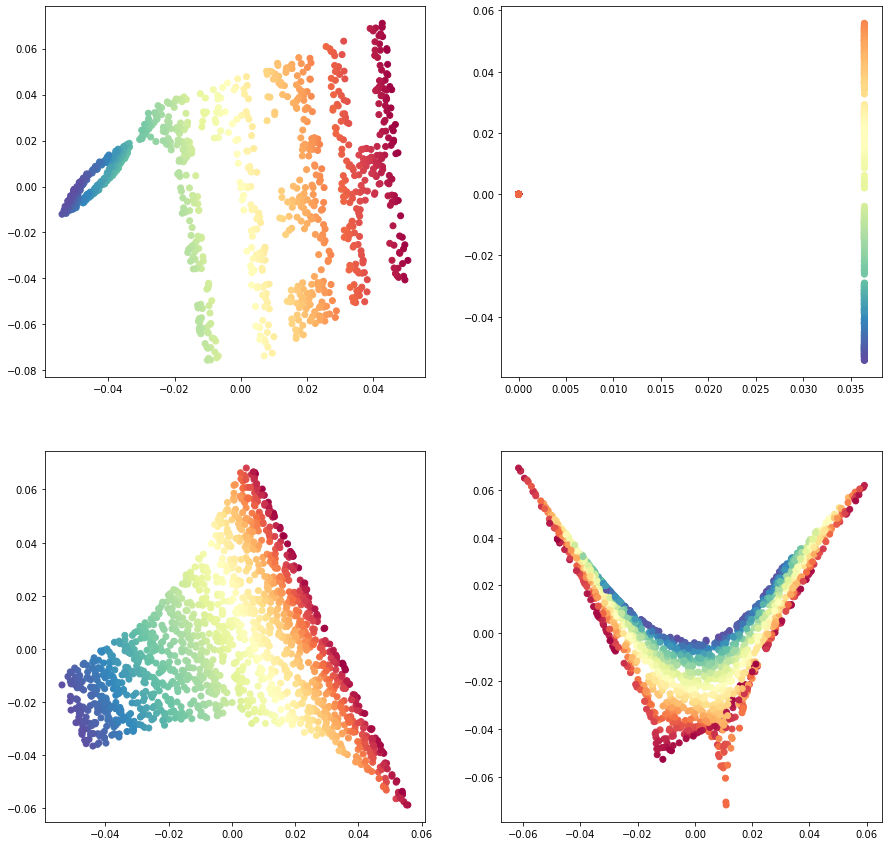

In [ ]:
# Plot result
fig = plt.figure()


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X_r1[:, 0], X_r1[:, 1], c=c1, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(222)
ax2.scatter(X_r2[:, 0], X_r2[:, 1], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X_r3[:, 0], X_r3[:, 1], c=c3, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(224)
ax2.scatter(X_r4[:, 0], X_r4[:, 1], c=c4, cmap=plt.cm.Spectral)
plt.show();

<Figure size 432x288 with 0 Axes>

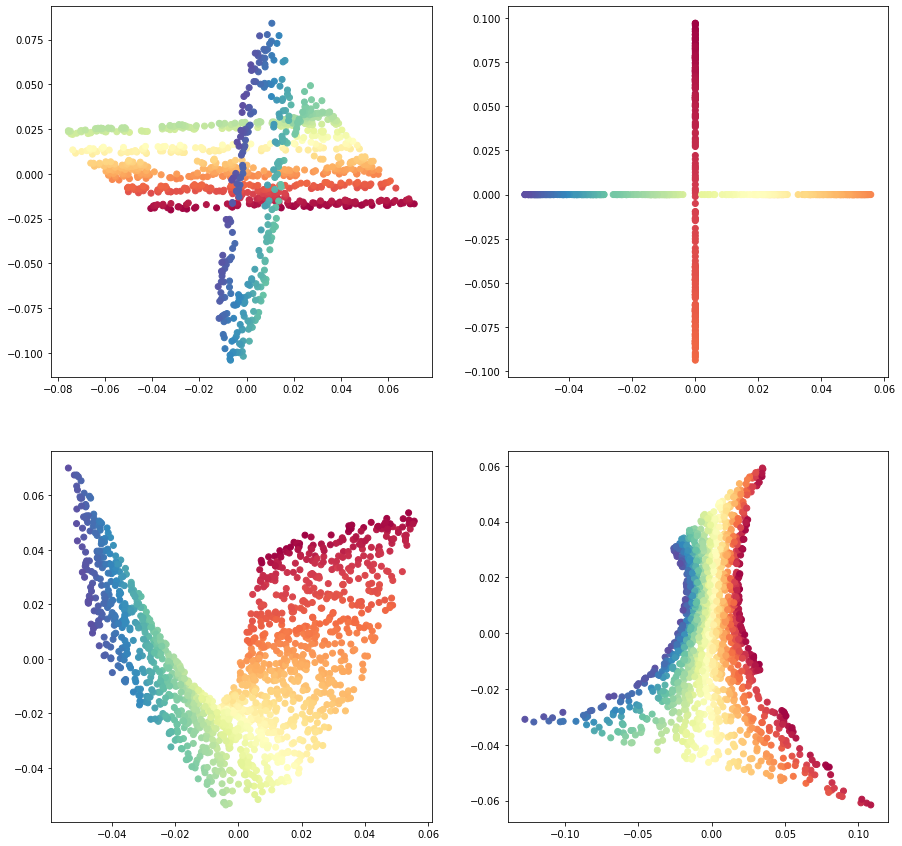

In [ ]:
# Autres facon de représenter les données:
fig = plt.figure()


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X_r1[:, 1], X_r1[:, 2], c=c1, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(222)
ax2.scatter(X_r2[:, 1], X_r2[:, 2], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X_r3[:, 0], X_r3[:, 2], c=c3, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(224)
ax2.scatter(X_r4[:, 2], X_r4[:, 0], c=c4, cmap=plt.cm.Spectral)
plt.show();

# Isomap

### Graphique 1

In [ ]:
VaR1=[]

for i in range(3,20):
    embedding = Isomap(n_neighbors=i, n_components=2)
    X1_transformed = embedding.fit_transform(X1)
    geo=embedding.dist_matrix_
    eucl=euclidean_distances(X1_transformed, X1_transformed)
    var_res=1 - (np.corrcoef(geo,eucl))**2
    VaR1.append(sum(np.diag(var_res)))
    print('n_neighbors %02i' % i, sum(np.diag(var_res)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 13 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/

n_neighbors 03 1.5898393712632242e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 04 1.7408297026122455e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 05 1.8385293287792592e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 06 1.794120407794253e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 07 1.9584334154387761e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 08 1.8451906669270102e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 09 1.865174681370263e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 10 1.7030821197749901e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 11 1.729727472365994e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 12 1.652011860642233e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 13 1.7541523789077473e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 14 1.425526363618701e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 15 1.5432100042289676e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 16 1.5942802633617248e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 17 1.4988010832439613e-13
n_neighbors 18 1.5498713423767185e-13
n_neighbors 19 1.5853984791647235e-13


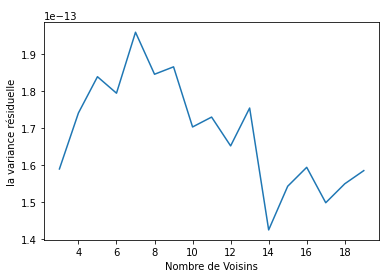

In [ ]:
p=19
plt.plot(np.arange(3,p+1),VaR1)
plt.title(" ")
plt.ylabel("la variance résiduelle")
plt.xlabel("Nombre de Voisins")
plt.show()

Nb de voisins : 14

In [ ]:
print("Computing Isomap embedding")
embedding = Isomap(n_neighbors=14, n_components=2)
X1_iso = embedding.fit_transform(X1)
geo=embedding.dist_matrix_
eucl=euclidean_distances(X1_iso, X1_iso)
var_res=1 - (np.corrcoef(geo,eucl))**2
print("Done. Residual variance: %g" % sum(np.diag(var_res)))

Computing Isomap embedding


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Done. Residual variance: 1.40998e-13


Graphique 2 

In [ ]:
VaR2=[]

for i in range(3,50):
    embedding = Isomap(n_neighbors=i, n_components=2)
    X2_transformed = embedding.fit_transform(X2)
    geo=embedding.dist_matrix_
    eucl=euclidean_distances(X2_transformed, X2_transformed)
    var_res=1 - (np.corrcoef(geo,eucl))**2
    VaR2.append(sum(np.diag(var_res)))
    print('n_neighbors %02i' % i, sum(np.diag(var_res)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 18 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/

n_neighbors 03 1.716404796070492e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 04 1.5942802633617248e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 05 1.5187850976872141e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 06 1.4699352846037073e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 07 1.3944401189291966e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 08 1.6364687382974807e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 09 1.5853984791647235e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 10 1.5831780331154732e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 11 1.6697754290362354e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 12 1.6209256159527285e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 13 1.638689184346731e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 14 1.5187850976872141e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 15 1.674216321134736e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 16 1.6076029396572267e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 17 1.667554982986985e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 18 1.2922996006636822e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 19 1.4588330543574557e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 20 1.4432899320127035e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 21 1.5054624213917123e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 22 1.4344081478157023e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 23 1.4788170688007085e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 24 1.432187701766452e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 25 1.5187850976872141e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 26 1.5409895581797173e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 27 1.474376176702208e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 28 1.4344081478157023e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 29 1.5187850976872141e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 30 1.5187850976872141e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 31 1.4033219031261979e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 32 1.596500709410975e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 33 1.496580637194711e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 34 1.432187701766452e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 35 1.4988010832439613e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 36 1.4988010832439613e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 37 1.4011014570769476e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 38 1.4810375148499588e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 39 1.474376176702208e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 40 1.4410694859634532e-13
n_neighbors 41 1.4144241333724494e-13
n_neighbors 42 1.4699352846037073e-13
n_neighbors 43 1.509903313490213e-13
n_neighbors 44 1.5276668818842154e-13
n_neighbors 45 1.4499512701604544e-13
n_neighbors 46 1.5831780331154732e-13
n_neighbors 47 1.4477308241112041e-13
n_neighbors 48 1.496580637194711e-13
n_neighbors 49 1.4943601911454607e-13


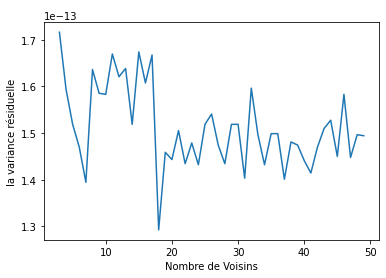

In [ ]:
p=49
plt.plot(np.arange(3,p+1),VaR2)
plt.title(" ")
plt.ylabel("la variance résiduelle")
plt.xlabel("Nombre de Voisins")
plt.show()

Nombre de voisins : 18

In [ ]:
print("Computing Isomap embedding")
embedding = Isomap(n_neighbors=18, n_components=2)
X2_iso = embedding.fit_transform(X2)
geo=embedding.dist_matrix_
eucl=euclidean_distances(X2_iso, X2_iso)
var_res=1 - (np.corrcoef(geo,eucl))**2
print("Done. Residual variance: %g" % sum(np.diag(var_res)))

Computing Isomap embedding


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Done. Residual variance: 1.23679e-13


Graphique 3 

In [ ]:
VaR3=[]

for i in range(3,60):
    embedding = Isomap(n_neighbors=i, n_components=2)
    X3_transformed = embedding.fit_transform(X3)
    geo=embedding.dist_matrix_
    eucl=euclidean_distances(X3_transformed, X3_transformed)
    var_res=1 - (np.corrcoef(geo,eucl))**2
    VaR3.append(sum(np.diag(var_res)))
    print('n_neighbors %02i' % i, sum(np.diag(var_res)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 03 2.142730437526552e-13


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


n_neighbors 04 2.0672352718520415e-13
n_neighbors 05 1.9828583219805296e-13
n_neighbors 06 2.036149027162537e-13
n_neighbors 07 2.0805579481475434e-13
n_neighbors 08 2.262634524186069e-13
n_neighbors 09 2.0583534876550402e-13
n_neighbors 10 1.9517720772910252e-13
n_neighbors 11 2.0605739337042905e-13
n_neighbors 12 1.9761969838327786e-13
n_neighbors 13 2.1316282072803006e-13
n_neighbors 14 2.1582735598713043e-13
n_neighbors 15 2.1094237467877974e-13
n_neighbors 16 2.1471713296250527e-13
n_neighbors 17 2.1449508835758024e-13
n_neighbors 18 2.0872192862952943e-13
n_neighbors 19 2.0694557179012918e-13
n_neighbors 20 2.0738966099997924e-13
n_neighbors 21 2.0250467969162855e-13
n_neighbors 22 2.0672352718520415e-13
n_neighbors 23 2.1360690993788012e-13
n_neighbors 24 2.1893598045608087e-13
n_neighbors 25 2.1382895454280515e-13
n_neighbors 26 2.1893598045608087e-13
n_neighbors 27 2.0450308113595383e-13
n_neighbors 28 2.1738166822160565e-13
n_neighbors 29 2.1027624086400465e-13
n_neighbors 30

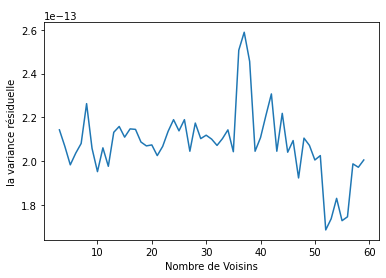

In [ ]:
p=59
plt.plot(np.arange(3,p+1),VaR3)
plt.title(" ")
plt.ylabel("la variance résiduelle")
plt.xlabel("Nombre de Voisins")
plt.show()

Nombre de voisins : 52

In [ ]:
print("Computing Isomap embedding")
embedding = Isomap(n_neighbors=52, n_components=2)
X3_iso = embedding.fit_transform(X3)
geo=embedding.dist_matrix_
eucl=euclidean_distances(X3_iso, X3_iso)
var_res=1 - (np.corrcoef(geo,eucl))**2
print("Done. Residual variance: %g" % sum(np.diag(var_res)))

Computing Isomap embedding
Done. Residual variance: 1.71418e-13


Graphique 4 

In [ ]:
VaR4=[]

for i in range(3,60):
    embedding = Isomap(n_neighbors=i, n_components=3)
    X4_transformed = embedding.fit_transform(X4)
    geo=embedding.dist_matrix_
    eucl=euclidean_distances(X4_transformed, X4_transformed)
    var_res=1 - (np.corrcoef(geo,eucl))**2
    VaR4.append(sum(np.diag(var_res)))
    print('n_neighbors %02i' % i, sum(np.diag(var_res)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

n_neighbors 03 2.469136006766348e-13
n_neighbors 04 2.4558133304708463e-13
n_neighbors 05 2.4802382370125997e-13
n_neighbors 06 2.3314683517128287e-13
n_neighbors 07 2.156053113822054e-13
n_neighbors 08 2.2160051571518125e-13
n_neighbors 09 2.191580250610059e-13
n_neighbors 10 2.1227464230832993e-13
n_neighbors 11 2.255973186038318e-13
n_neighbors 12 2.1027624086400465e-13
n_neighbors 13 2.0827783941967937e-13
n_neighbors 14 2.0938806244430452e-13
n_neighbors 15 2.227107387398064e-13
n_neighbors 16 2.05613304160579e-13
n_neighbors 17 1.8984813721090177e-13
n_neighbors 18 1.8540724511240114e-13
n_neighbors 19 1.7963408538435033e-13
n_neighbors 20 1.8385293287792592e-13
n_neighbors 21 2.0805579481475434e-13
n_neighbors 22 2.0095036745715333e-13
n_neighbors 23 2.0028423364237824e-13
n_neighbors 24 2.0405899192610377e-13
n_neighbors 25 2.0117241206207837e-13
n_neighbors 26 2.0827783941967937e-13
n_neighbors 27 2.0583534876550402e-13
n_neighbors 28 2.0827783941967937e-13
n_neighbors 29 2.04

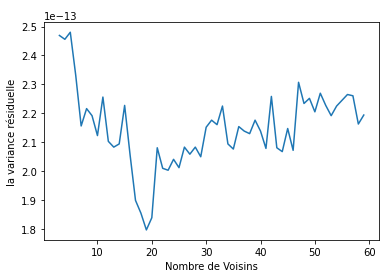

In [ ]:
p=59
plt.plot(np.arange(3,p+1),VaR4)
plt.title(" ")
plt.ylabel("la variance résiduelle")
plt.xlabel("Nombre de Voisins")
plt.show()

Nb de voisins : 19

In [ ]:
print("Computing Isomap embedding")
embedding = Isomap(n_neighbors=19, n_components=2)
X4_iso = embedding.fit_transform(X4)
geo=embedding.dist_matrix_
eucl=euclidean_distances(X4_iso, X4_iso)
var_res=1 - (np.corrcoef(geo,eucl))**2
print("Done. Residual variance: %g" % sum(np.diag(var_res)))

Computing Isomap embedding
Done. Residual variance: 1.8141e-13


In [ ]:
var_res

array([[2.22044605e-16, 3.43544768e-01, 3.44270711e-01, ...,
        1.40674275e-01, 8.42765506e-01, 8.02187401e-01],
       [3.43544768e-01, 2.22044605e-16, 4.55580140e-01, ...,
        1.91840283e-01, 9.66821149e-01, 9.60729430e-01],
       [3.44270711e-01, 4.55580140e-01, 0.00000000e+00, ...,
        1.86047916e-01, 5.04268537e-01, 4.72100307e-01],
       ...,
       [1.40674275e-01, 1.91840283e-01, 1.86047916e-01, ...,
        0.00000000e+00, 8.13980667e-01, 7.88845005e-01],
       [8.42765506e-01, 9.66821149e-01, 5.04268537e-01, ...,
        8.13980667e-01, 0.00000000e+00, 1.02415728e-02],
       [8.02187401e-01, 9.60729430e-01, 4.72100307e-01, ...,
        7.88845005e-01, 1.02415728e-02, 0.00000000e+00]])

Les 4 plots 

<Figure size 432x288 with 0 Axes>

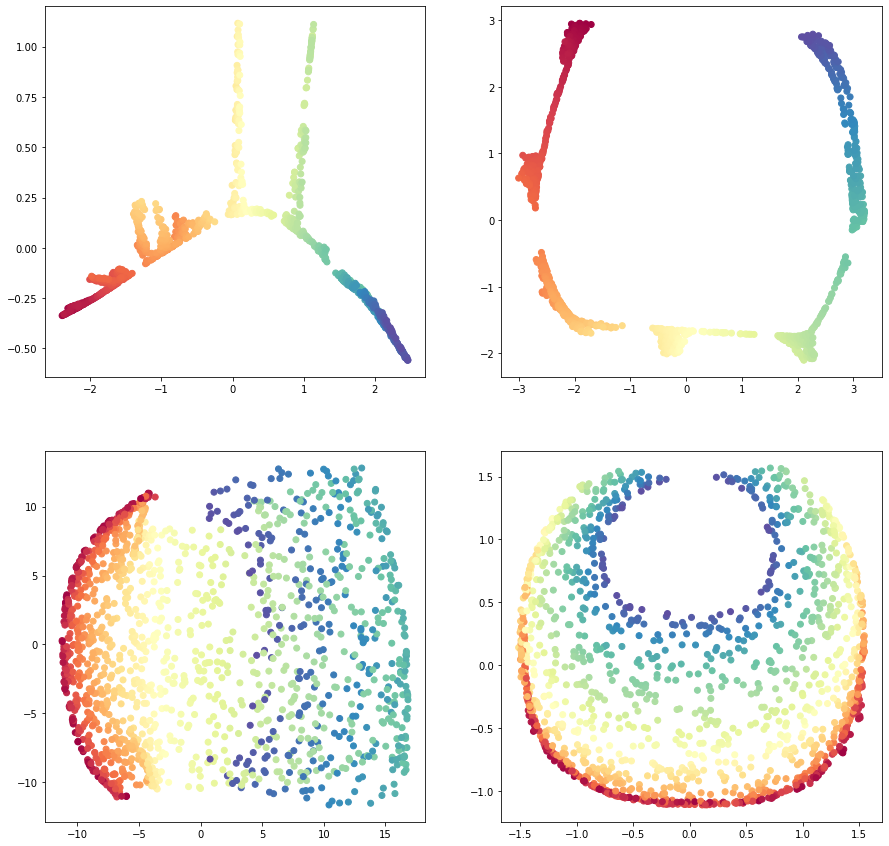

In [ ]:
# Plot result
fig = plt.figure()


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X1_iso[:, 0], X1_iso[:, 1], c=c1, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(222)
ax2.scatter(X2_iso[:, 0], X2_iso[:, 1], c=c2, cmap=plt.cm.Spectral)
ax1 = fig.add_subplot(223)
ax1.scatter(X3_iso[:, 0], X3_iso[:, 1], c=c3, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(224)
ax2.scatter(X4_iso[:, 0], X4_iso[:, 1], c=c4, cmap=plt.cm.Spectral)
plt.show();

# Comparaison des modèles 
## Première image (HELLO)

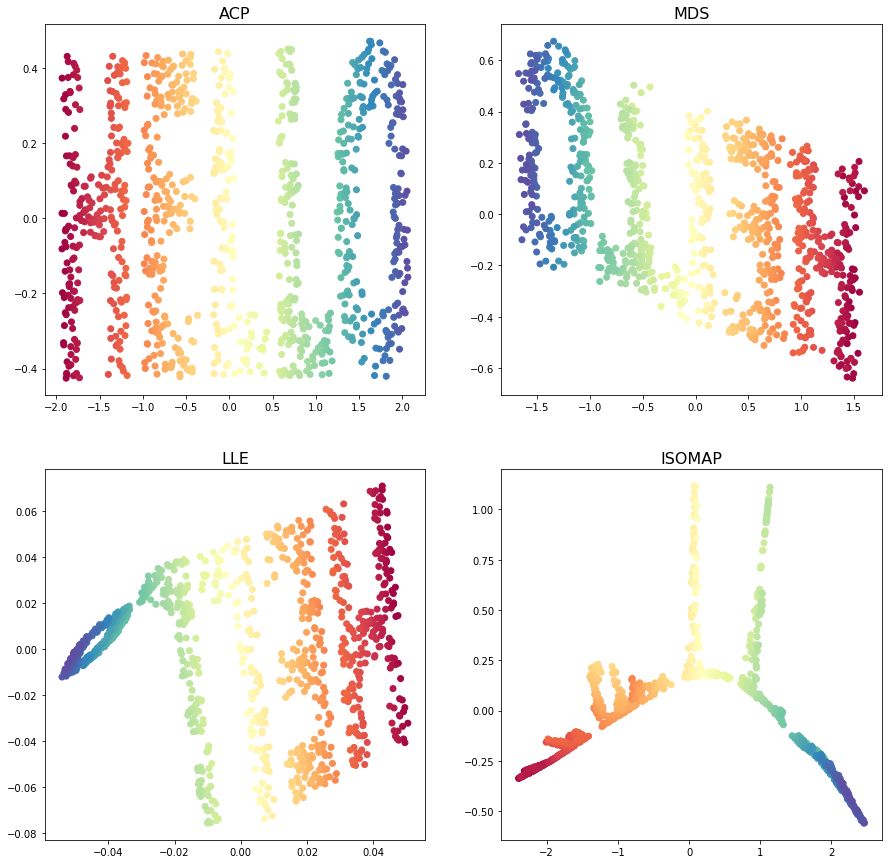

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X1_acp[:, 0], X1_acp[:, 1], c=c1, cmap=plt.cm.Spectral) 
ax1.set_title('ACP', fontsize=16)
ax2 = fig.add_subplot(222)
ax2.scatter(X1_mds[:, 0], X1_mds[:, 2], c=c1, cmap=plt.cm.Spectral) 
ax2.set_title('MDS', fontsize=16)
ax1 = fig.add_subplot(223)
ax1.set_title('LLE', fontsize=16)
ax1.scatter(X_r1[:, 0], X_r1[:, 1], c=c1, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224)
ax2.scatter(X1_iso[:, 0], X1_iso[:, 1], c=c1, cmap=plt.cm.Spectral)
ax2.set_title('ISOMAP', fontsize=16)
plt.show()

Il semblerait que la réduction de dimension par la méthode de l'ACP et du MDS semblent tout à fait convenir pour afficher ce "HELLO" en 2D. 


## Deuxième image (HELLO 2)

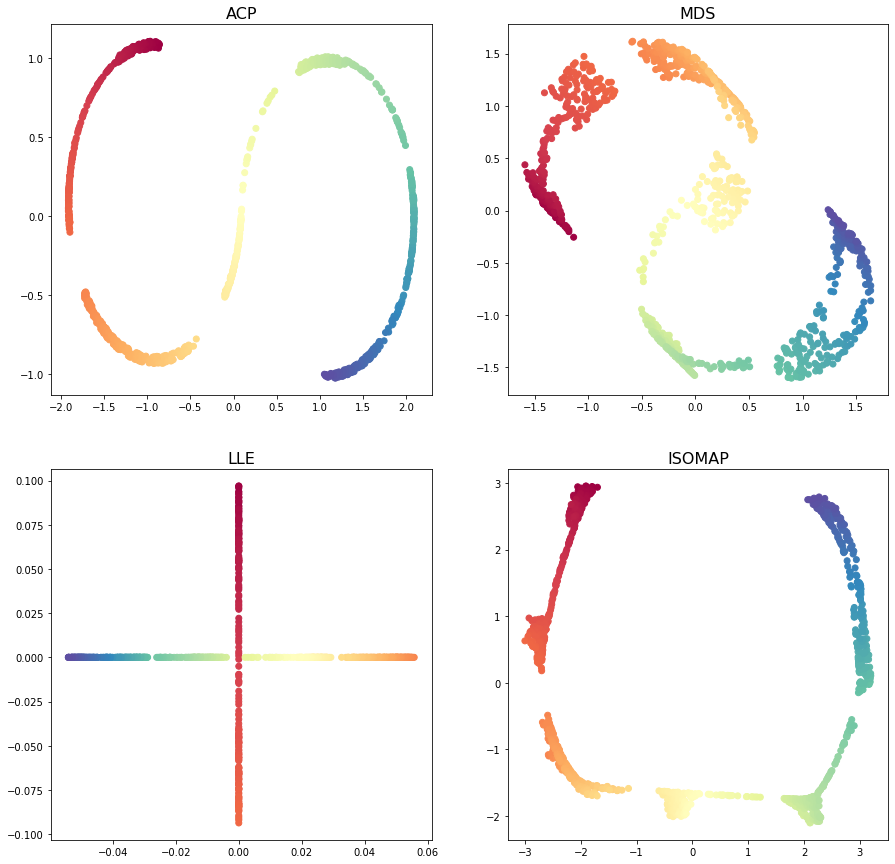

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X2_acp[:, 0], X2_acp[:, 1], c=c2, cmap=plt.cm.Spectral)
ax1.set_title('ACP', fontsize=16)
ax2 = fig.add_subplot(222)
ax2.scatter(X2_mds[:, 1], X2_mds[:, 0], c=c2, cmap=plt.cm.Spectral)
ax2.set_title('MDS', fontsize=16)
ax1 = fig.add_subplot(223)
ax1.set_title('LLE', fontsize=16)
ax1.scatter(X_r2[:, 1], X_r2[:, 2], c=c2, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(224)
ax2.scatter(X2_iso[:, 0], X2_iso[:, 1], c=c2, cmap=plt.cm.Spectral)
ax2.set_title('ISOMAP', fontsize=16)
plt.show()

Ici la réduction par la méthode du MDS semble être la mieux adaptée. Nous remarquons que l'ensemble des lettres qui constituent le mot "HELLO" forment un S dans l'espace. 
Il est évident de voir que le LLE n'est pas du tout adapté pour le représentation de cette figure. 
Isomap n'affiche pas les lettres mais arrive à distinguer cinq éléments.

## Troisième image (Swiss roll)

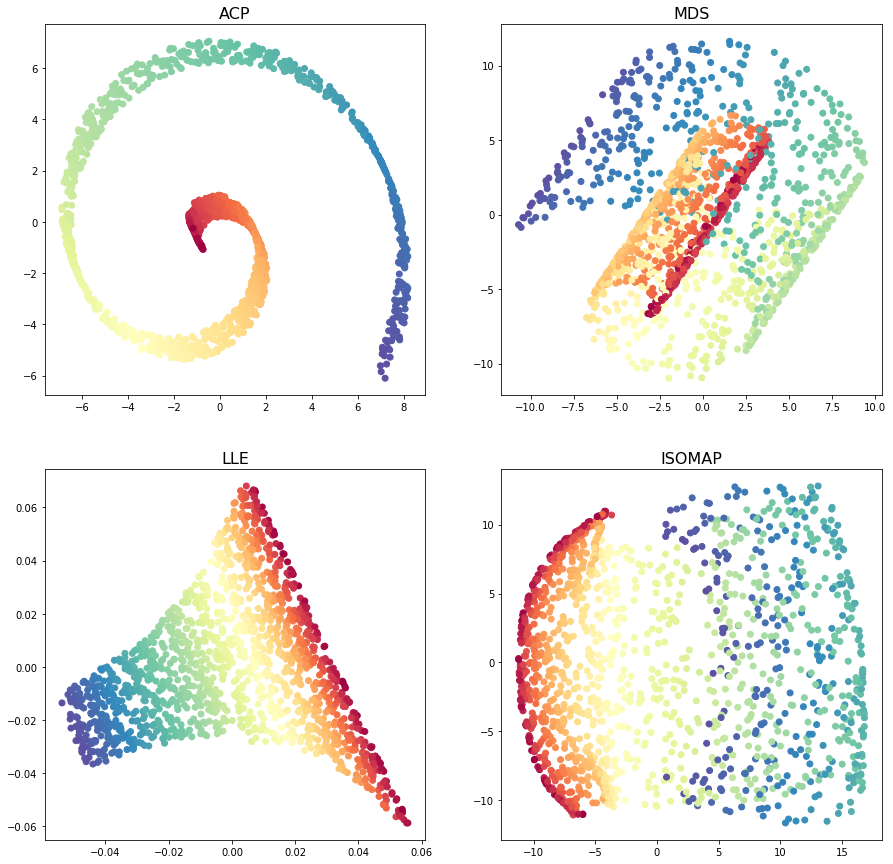

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X3_acp[:, 1], X3_acp[:, 2], c=c3, cmap=plt.cm.Spectral) 
ax1.set_title('ACP', fontsize=16)
ax2 = fig.add_subplot(222)
ax2.scatter(X3_mds[:, 0], X3_mds[:, 1], c=c3, cmap=plt.cm.Spectral) 
ax2.set_title('MDS', fontsize=16)
ax1 = fig.add_subplot(223)
ax1.set_title('LLE', fontsize=16)
ax1.scatter(X_r3[:, 0], X_r3[:, 1], c=c3, cmap=plt.cm.Spectral) 
ax2 = fig.add_subplot(224)
ax2.scatter(X3_iso[:, 0], X3_iso[:, 1], c=c3, cmap=plt.cm.Spectral)
ax2.set_title('ISOMAP', fontsize=16)
plt.show()

La méthode du LLE semble totalement adapté. Isomap arrive à dérouler une partie et fait mieux que ACP et MDS.

## Quatrième image (Punched sphere)

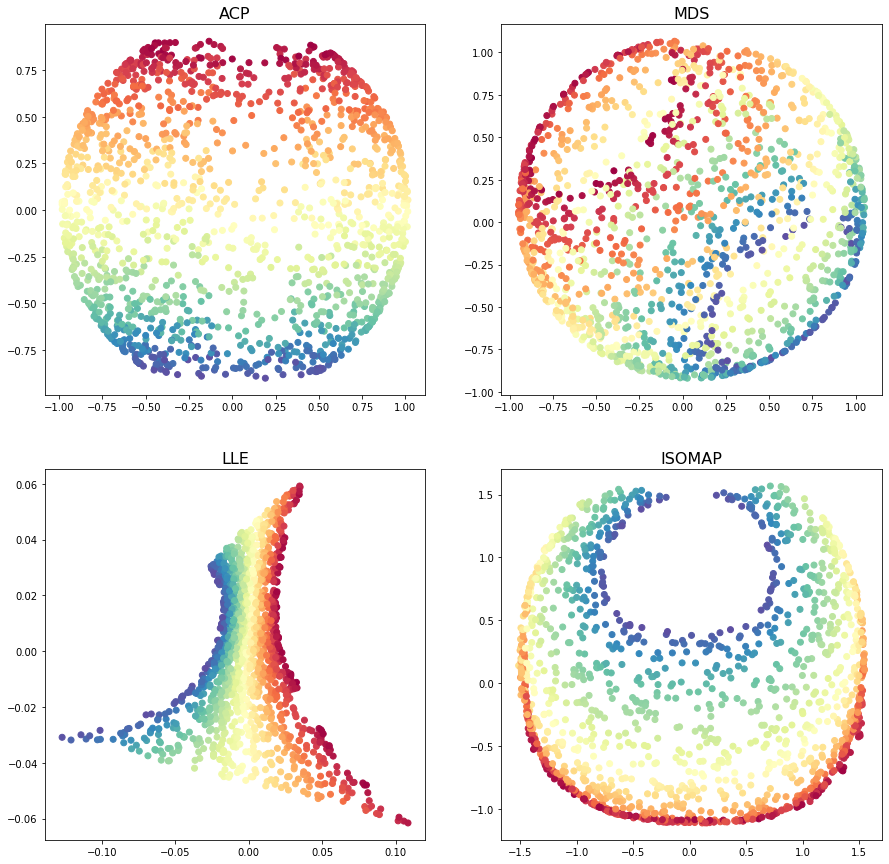

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(X4_acp[:, 0], X4_acp[:, 2], c=c4, cmap=plt.cm.Spectral)
ax1.set_title('ACP', fontsize=16)
ax2 = fig.add_subplot(222)
ax2.scatter(X4_mds[:, 0], X4_mds[:, 1], c=c4, cmap=plt.cm.Spectral)
ax2.set_title('MDS', fontsize=16)
ax1 = fig.add_subplot(223)
ax1.set_title('LLE', fontsize=16)
ax1.scatter(X_r4[:, 2], X_r4[:, 0], c=c4, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(224)
ax2.scatter(X4_iso[:, 0], X4_iso[:, 1], c=c4, cmap=plt.cm.Spectral)
ax2.set_title('ISOMAP', fontsize=16)
plt.show()

Ici, MDS et ACP sont moins performants, on retrouve preque la même image qu'au départ. Par contre, le résultat avec LLE et Isomap paraît plus prometteur. 